## Infringement detection on Airbnb

We analyze the Airbnb listings of three European metropolitan areas (Stockholm, Rome, Barcelona) and examine the extent to which applicable laws are complied with. Based on our findings, we create a model that classifies listings into different categories.

Data used in this project is taken from [Inside Airbnb](http://insideairbnb.com/get-the-data/). 

Some additional data is collected by a webscraper.

### About Airbnb

Airbnb is an American company operating an online marketplace for short-term homestays and experiences. 

It started as a more evolved version of couch surfing, in which youthful travellers used social media to find a free place to crash. Couch surfing was predicated on personal exchange: hosts got to know their guests, with the understanding that one day they might spend a free night at their guests’ home. Airbnb introduced the notion of hosts charging an affordable rate for that place to crash, so that a tourist on a budget could book a bed in the spare room of a local’s home.

The conceit of friendly locals renting out spare rooms has been supplanted by a more mercenary model, in which centuries-old apartment buildings are hollowed out with ersatz hotel rooms. Many properties have been bought specifically as short-term-rental investments, managed by agencies that have dozens of such properties.

The company acts as a broker and charges a commission from each booking. Both private and commercial landlords rent out accommodations under the mediation of the company, but without Airbnb assuming any legal obligations. 

From its founding in 2008 to March 2020, more than 900 million overnight stays were booked through Airbnb, according to the company.

### Criticism of Airbnb

Airbnb has come under criticism for a number of reasons, including the fact that:
- The mass subletting of housing at high prices for short stays is putting further pressure on the already tight housing market in some cities. Housing is becoming scarcer, rents are rising.
- Fewer taxes are being collected through tourism.
- Municipalities are losing control over the amount of tourism. 
- Residents are annoyed by the many strangers coming in and out of their homes. 

### Hypotheses

- commercial hosts tend to have several properties
- commercial hosts tend to rent out for (almost) the entire year
- 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
c = ['#cbc0d3', '#efd3d7', '#feeafa', '#dee2ff', '#8e9aaf']
c2 = ['#8e9aaf', '#919db1', '#949fb3', '#97a2b5', '#9aa5b8', '#9da8ba', '#a0aabb', '#a3adbe', '#a7b1c1', '#abb4c4', '#afb7c6', '#b3bbca', '#b9c0cd', '#bdc4d0', '#c0c7d3', '#c6ccd7', '#ced3dc']
c3 = ['#efd3d7', '#ecccd0', '#eac6cb', '#e9c2c7', '#e7bcc2', '#e5b7bd', '#e3b1b8', '#e1aeb5', '#dfa7af', '#dea3ab', '#dc9fa8', '#da9aa3', '#d8949e', '#d7929c']
plt.style.use('default')

In [2]:
bcn_orginal = pd.read_csv('../data/listings_bcn.csv')
scraped = pd.read_csv('../data/airbnb2.csv')

In [3]:
scraped.rename(columns = {'url':'listing_url'}, inplace = True)

In [4]:
bcn_new=bcn_orginal.merge(scraped, on='listing_url', how='outer')

In [5]:
bcn_new = bcn_new.drop(['Unnamed: 0'], axis=1)

In [6]:
bcn_new['host_id'].nunique()

6227

In [7]:
bcn_new['host_name'].nunique()

3076

In [8]:
bcn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15655 entries, 0 to 15654
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15655 non-null  int64  
 1   listing_url                                   15655 non-null  object 
 2   scrape_id                                     15655 non-null  int64  
 3   last_scraped                                  15655 non-null  object 
 4   source                                        15655 non-null  object 
 5   name                                          15646 non-null  object 
 6   description                                   15569 non-null  object 
 7   neighborhood_overview                         9204 non-null   object 
 8   picture_url                                   15655 non-null  object 
 9   host_id                                       15655 non-null 

In [9]:
bcn_new.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.565500e+04,1.565500e+04,1.565500e+04,15653.000000,15653.000000,15655.000000,15655.000000,15655.000000,0.0,15098.000000,...,12089.000000,12084.000000,12090.000000,12084.000000,12085.000000,15655.000000,15655.000000,15655.000000,15655.000000,12176.000000
mean,1.823385e+17,2.023031e+13,1.450517e+08,33.219575,47.700569,41.391943,2.167214,3.484510,NaN,1.758511,...,4.581542,4.709420,4.709391,4.747661,4.467860,24.163462,21.142510,2.856404,0.084063,1.299759
std,3.126641e+17,0.000000e+00,1.555632e+08,75.886992,122.550600,0.013936,0.017259,2.172102,NaN,1.051358,...,0.518338,0.456223,0.467022,0.371416,0.537626,46.168220,45.881018,11.617766,0.789422,1.747771
min,1.867400e+04,2.023031e+13,3.073000e+03,1.000000,1.000000,41.352608,2.091590,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.891816e+07,2.023031e+13,9.171437e+06,1.000000,2.000000,41.381040,2.157340,2.000000,NaN,1.000000,...,4.440000,4.640000,4.630000,4.670000,4.310000,1.000000,0.000000,0.000000,0.000000,0.210000
50%,3.864140e+07,2.023031e+13,7.067177e+07,6.000000,8.000000,41.389740,2.168246,3.000000,NaN,1.000000,...,4.720000,4.850000,4.850000,4.850000,4.580000,5.000000,2.000000,0.000000,0.000000,0.770000
75%,5.563748e+17,2.023031e+13,2.651478e+08,28.000000,39.000000,41.401295,2.177460,4.000000,NaN,2.000000,...,4.920000,5.000000,5.000000,5.000000,4.790000,23.000000,19.000000,1.000000,0.000000,1.900000
max,8.462300e+17,2.023031e+13,5.049885e+08,1817.000000,3639.000000,41.459560,2.227710,16.000000,NaN,20.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,241.000000,241.000000,120.000000,12.000000,47.160000


In [10]:
bcn_new.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3479
host_type                                       4201
Length: 76, dtype: int64

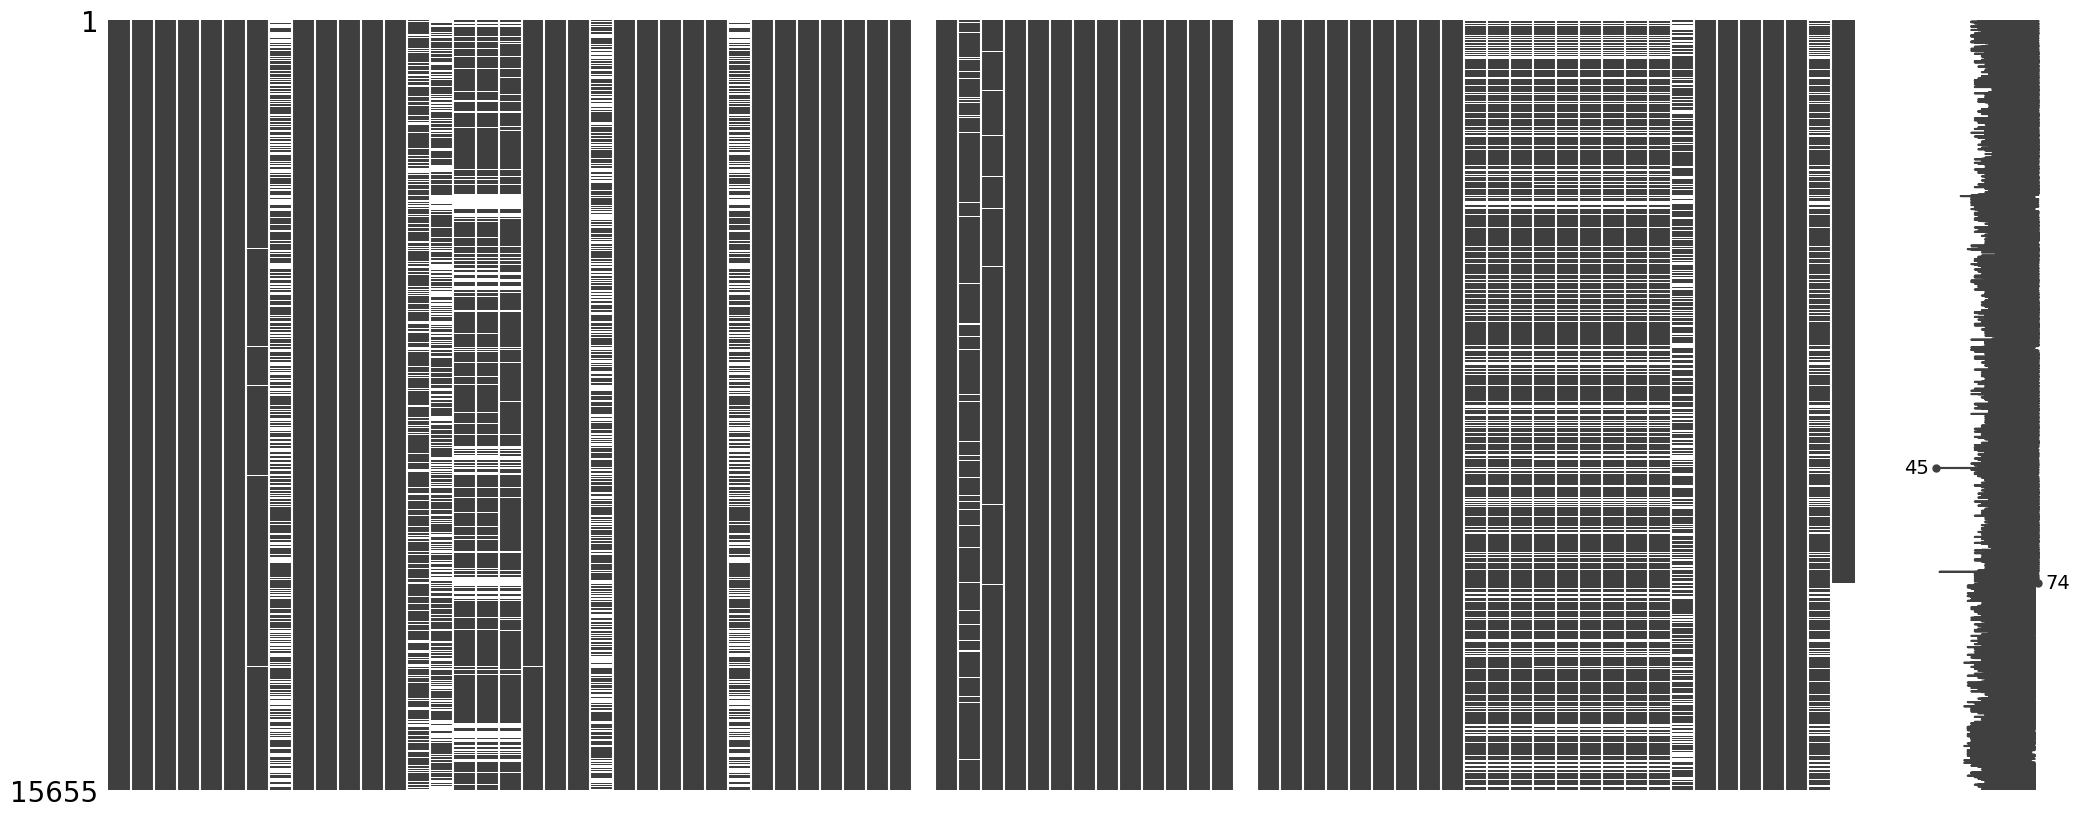

In [11]:
import missingno as msno
msno.matrix(bcn_new);

In [12]:
bcn_new['license'].isnull().sum()

4813

In [13]:
bcn_new['license'].duplicated()

0        False
1        False
2        False
3        False
4         True
         ...  
15650    False
15651     True
15652    False
15653    False
15654     True
Name: license, Length: 15655, dtype: bool

In [14]:
bcn_new.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [15]:
bcn_new[['listing_url', 'host_listings_count', 'host_total_listings_count']].head(30)

,listing_url,host_listings_count,host_total_listings_count
0,https://www.airbnb.com/rooms/13977576,1.0,1.0
1,https://www.airbnb.com/rooms/42105584,1.0,2.0
2,https://www.airbnb.com/rooms/33727898,4.0,4.0
3,https://www.airbnb.com/rooms/44995311,7.0,8.0
4,https://www.airbnb.com/rooms/15763812,1.0,2.0
5,https://www.airbnb.com/rooms/803393140432518554,9.0,17.0
6,https://www.airbnb.com/rooms/780199485511285785,3.0,6.0
7,https://www.airbnb.com/rooms/838145051667285647,43.0,64.0
8,https://www.airbnb.com/rooms/38091474,119.0,163.0
9,https://www.airbnb.com/rooms/23035068,1.0,1.0


In [16]:
# drop some irrelevant or redundant colums
bcn = bcn_new.drop(['scrape_id', 'last_scraped', 'source', 'description', 'neighborhood_overview', 'picture_url', 'host_listings_count', 'host_total_listings_count', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped', 'neighbourhood',
       'neighbourhood_cleansed', ], axis=1)

In [17]:
# drop bathrooms column since it only contains NaN values
bcn = bcn.drop(['bathrooms', 'calendar_updated'], axis=1)

In [18]:
bcn.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_sco

In [19]:
bcn['bathrooms_text'].value_counts()

bathrooms_text
1 bath               6336
2 baths              2914
1 shared bath        2543
1 private bath       1285
1.5 baths             713
1.5 shared baths      577
2 shared baths        447
3 baths               231
2.5 baths             127
4 baths                86
2.5 shared baths       65
0 shared baths         64
3 shared baths         47
3.5 baths              28
5 baths                28
0 baths                26
Half-bath              16
11 shared baths        14
3.5 shared baths       14
6 baths                12
5 shared baths         12
4.5 baths              11
Shared half-bath       11
4 shared baths         10
5.5 baths               7
Private half-bath       4
8 baths                 3
7 shared baths          3
7.5 baths               2
5.5 shared baths        2
6 shared baths          2
10 shared baths         2
8 shared baths          1
7.5 shared baths        1
13 shared baths         1
12 shared baths         1
10 baths                1
Name: count, dtype: int

In [20]:
bcn['bathrooms_text'].isnull().sum()

8

In [21]:
bcn['price'] = bcn['price'].str[1:]

In [22]:
bcn['price'] = bcn['price'].str.replace(',','')

In [23]:
bcn['price'] = pd.to_numeric(bcn['price'])

In [24]:
bcn['price'].describe()

count    15655.000000
mean       155.644011
std        966.108173
min          0.000000
25%         50.000000
50%         99.000000
75%        164.000000
max      90000.000000
Name: price, dtype: float64

<Axes: >

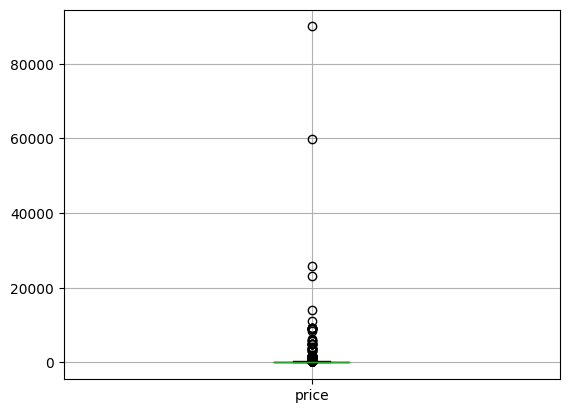

In [25]:
# check for outliers
bcn.boxplot(column='price')

In [26]:
# remove outliers with IQR method

for x in ['price']:
    q75, q25 = np.percentile(bcn.loc[:,x],[75,25])
    intr_qr = q75-q25
    maxp = q75+(1.5*intr_qr)
    minp = q25-(1.5*intr_qr)
    
    bcn.loc[bcn[x] < minp,x] = np.nan
    bcn.loc[bcn[x] > maxp,x] = np.nan
    
bcn['price'].isnull().sum()
bcn['price'] = bcn['price'].dropna(axis=0)

In [27]:
bcn = bcn[bcn.price.notnull()]

In [28]:
bcn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14779 entries, 0 to 15654
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14779 non-null  int64  
 1   listing_url                                   14779 non-null  object 
 2   name                                          14770 non-null  object 
 3   host_id                                       14779 non-null  int64  
 4   host_url                                      14779 non-null  object 
 5   host_name                                     14777 non-null  object 
 6   host_since                                    14777 non-null  object 
 7   host_location                                 11464 non-null  object 
 8   host_response_time                            11879 non-null  object 
 9   host_response_rate                            11879 non-null  obje

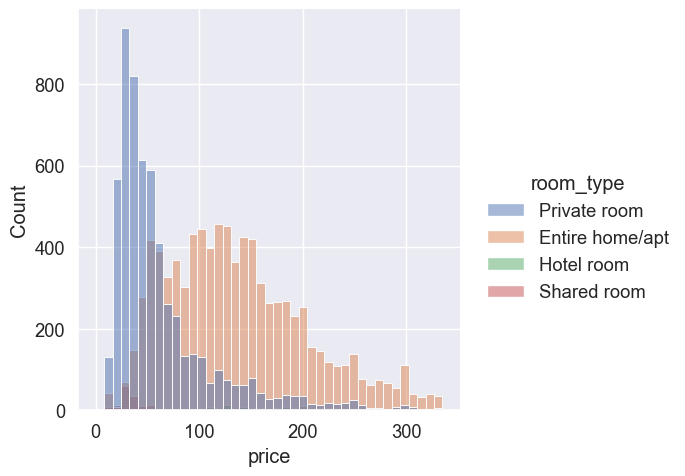

In [29]:
# plot distribution
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data=bcn, x="price", hue='room_type', kind='hist')

<Axes: ylabel='neighbourhood_group_cleansed'>

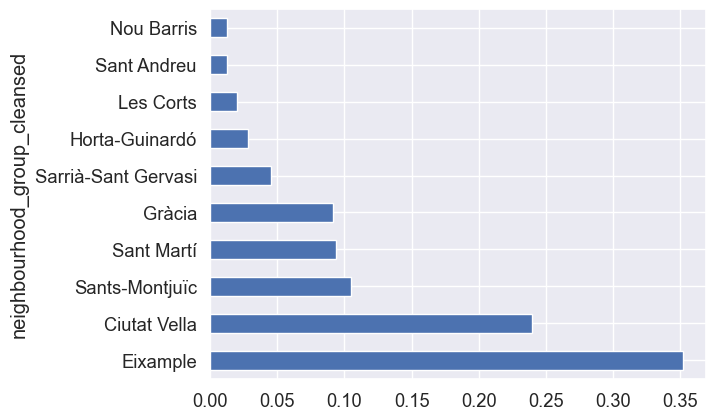

In [30]:
bcn['neighbourhood_group_cleansed'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

<Axes: ylabel='room_type'>

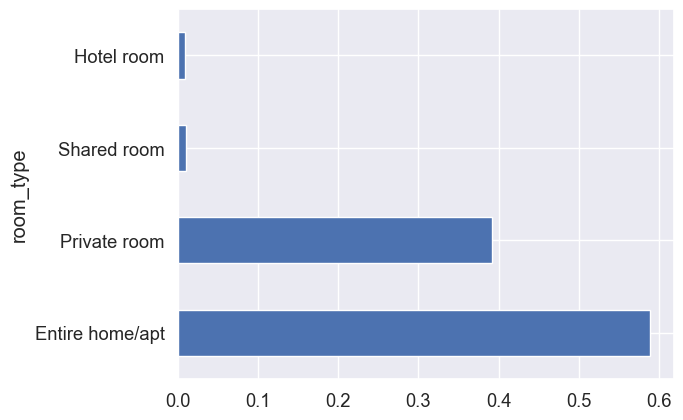

In [31]:
bcn['room_type'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

In [32]:
duplicate_license = bcn[bcn.duplicated('license', keep=False)].copy()
duplicate_license = duplicate_license['license'].dropna()
duplicate_license_array = duplicate_license.unique()
arr = duplicate_license_array[duplicate_license_array != 'Exempt']

In [33]:
def license_duplicates(array):
    new_arr = []
    for license in array:
        if 'HUTB' in license:
            new_arr.append(license)
        elif 'HB' in license:
            new_arr.append(license)
        elif 'AJ' in license:
            new_arr.append(license)
    return new_arr

In [34]:
license_duplicates = license_duplicates(arr)

In [35]:
bcn['license'] = bcn['license'].fillna('no license')

In [36]:
def is_valid_license(license):
    if license in license_duplicates:
        return 'reuse'
    if 'HUTB' in license:
        return 'ok'
    if 'HB' in license:
        return 'ok'
    if 'AJ' in license:
        return 'ok'
    elif 'exempt' in license.lower():
        return 'claims exempt'
    else:
        return 'no license'

In [37]:
bcn['status_license'] = bcn.apply(lambda row: is_valid_license(row['license']), axis=1)

In [38]:
def multi_listings(listings):
    if listings == 1:
        return 'single listing'
    if listings > 1 and listings < 4:
        return '2-3 listings'
    if listings > 3 and listings < 6:
        return '4-5 listings'
    if listings > 5 and listings < 10:
        return '6-9 listings'
    if listings > 9 and listings < 20:
        return '10-19 listings'
    if listings > 19 and listings < 50:
        return '20-49 listings'
    if listings > 49:
        return '50 or more listings'

In [39]:
bcn['total_listings'] = bcn.groupby('host_id')['id'].transform('size')

In [40]:
bcn['multi_listings'] = bcn.apply(lambda row: multi_listings(row['total_listings']), axis=1)

In [41]:
bcn.sort_values(by='total_listings', ascending=False)

,id,listing_url,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_type,status_license,total_listings,multi_listings
13899,608550274459547175,https://www.airbnb.com/rooms/608550274459547175,CHALBY - 4 Bedroom Duplex apartment with terra...,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,t,241,241,0,0,0.20,NaN,no license,241,50 or more listings
15180,714893664098887932,https://www.airbnb.com/rooms/714893664098887932,FESHI - 3 bedroom apartment in Eixample Dreta,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,t,241,241,0,0,NaN,NaN,no license,241,50 or more listings
667,644771126156262079,https://www.airbnb.com/rooms/644771126156262079,YULU - 3 bedroom apartment in Eixample Dreta,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,t,241,241,0,0,NaN,commercial,no license,241,50 or more listings
4263,51163555,https://www.airbnb.com/rooms/51163555,HEGRA - 2 bedroom apartment with balcony in Ei...,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,f,241,241,0,0,NaN,commercial,no license,241,50 or more listings
226,49509615,https://www.airbnb.com/rooms/49509615,KUTA - 2 bedroom apartment in Sant Gervasi,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",within an hour,100%,...,f,241,241,0,0,NaN,commercial,no license,241,50 or more listings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,10238081,https://www.airbnb.com/rooms/10238081,GRAN BORN,15032322,https://www.airbnb.com/users/show/15032322,Elisa,2014-05-03,"Barcelona, Spain",NaN,NaN,...,t,1,1,0,0,0.14,private,no license,1,single listing
8283,3501634,https://www.airbnb.com/rooms/3501634,"LOVELY LOFT- ATTIC &TERRACE, GRACIA",17630005,https://www.airbnb.com/users/show/17630005,Xavi & Luna,2014-07-04,"Barcelona, Spain",within an hour,100%,...,f,1,1,0,0,2.92,private,ok,1,single listing
8276,684418,https://www.airbnb.com/rooms/684418,Precioso apartamento en Barcelona,3489813,https://www.airbnb.com/users/show/3489813,Sonia,2012-09-06,"Madrid, Spain",within an hour,95%,...,t,1,1,0,0,NaN,commercial,no license,1,single listing
8275,758614113263844483,https://www.airbnb.com/rooms/758614113263844483,Private Room in new apartment in Barcelona center,259945768,https://www.airbnb.com/users/show/259945768,Can,2019-05-05,NaN,within an hour,100%,...,f,1,0,1,0,2.83,private,claims exempt,1,single listing


EDA ON HOSTS

In [42]:
bcn.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_sco

In [43]:
hosts = bcn.groupby(['host_id', 'host_name']).agg(listings = ('id', 'count'))

In [44]:
hosts.sort_values(by='listings', ascending=False)

,,listings
host_id,host_name,
346367515,Ukio,241
32037490,SweetInn,178
299462,Stay U-Nique,127
158023606,Habitat Apartments,122
1391607,Aline I Andrea,121
...,...,...
35365408,Emanuel,1
35358773,Joanna,1
35327702,Bahram,1


In [45]:
def short_term(row):
    if row['minimum_nights'] > 31:
        return 'Long term stays only'
    else:
        return 'Short term stays'

In [46]:
bcn['short_term'] = bcn.apply(lambda row: short_term(row), axis=1)

<Axes: ylabel='status_license'>

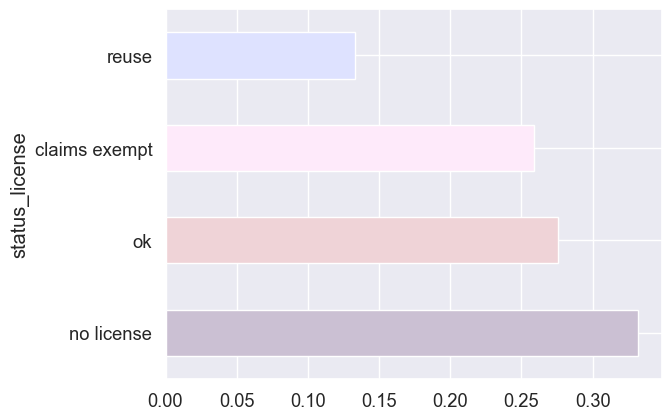

In [47]:
bcn['status_license'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh', color=c)

<Axes: ylabel='multi_listings'>

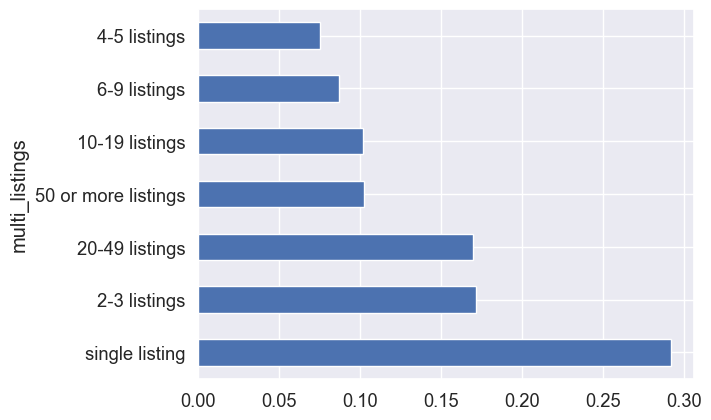

In [48]:
bcn['multi_listings'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

In [49]:
commercial = bcn.loc[bcn['host_type'] == 'commercial']
private = bcn.loc[bcn['host_type'] == 'private']

In [50]:
reuse = bcn[(bcn['status_license'] == 'reuse') & (bcn['room_type'] == 'Entire home/apt')]
reuse.head(20)

,id,listing_url,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_type,status_license,total_listings,multi_listings,short_term
5,803393140432518554,https://www.airbnb.com/rooms/803393140432518554,New Amazing 2 bedroom apartment in Rambla del,127482361,https://www.airbnb.com/users/show/127482361,Apkeys,2017-04-25,"Barcelona, Spain",within an hour,100%,...,8,8,0,0,1.00,private,reuse,8,6-9 listings,Short term stays
11,731044538005221854,https://www.airbnb.com/rooms/731044538005221854,3 Bedroom apartment Sant Pau,10704,https://www.airbnb.com/users/show/10704,Weflating,2009-03-19,"Barcelona, Spain",within an hour,84%,...,27,22,3,0,0.42,commercial,reuse,26,20-49 listings,Short term stays
22,826058899941662636,https://www.airbnb.com/rooms/826058899941662636,Cathedral Penthouse. (Temporal). m,21726991,https://www.airbnb.com/users/show/21726991,Silvia,2014-09-24,NaN,within a day,91%,...,48,48,0,0,NaN,private,reuse,36,20-49 listings,Short term stays
36,37229476,https://www.airbnb.com/rooms/37229476,Art Gallery Apartment,4396136,https://www.airbnb.com/users/show/4396136,Homesearch,2012-12-13,"Barcelona, Spain",within an hour,92%,...,28,28,0,0,0.21,commercial,reuse,28,20-49 listings,Short term stays
86,44095658,https://www.airbnb.com/rooms/44095658,Ola Living Santa Anna Attic,33278356,https://www.airbnb.com/users/show/33278356,Ola,2015-05-13,"Barcelona, Spain",within an hour,99%,...,62,46,16,0,1.20,commercial,reuse,60,50 or more listings,Short term stays
93,5454335,https://www.airbnb.com/rooms/5454335,PISO CON PISCINA EN VILLA OLIMPICA,8210620,https://www.airbnb.com/users/show/8210620,Beatriz,2013-08-17,"Barcelona, Spain",within an hour,100%,...,3,3,0,0,0.46,private,reuse,2,2-3 listings,Short term stays
96,24239102,https://www.airbnb.com/rooms/24239102,"Apart with balcony, Plaza España/Sants (1822)",146682595,https://www.airbnb.com/users/show/146682595,Ana & Rafa,2017-08-18,"Barcelona, Spain",within an hour,100%,...,8,8,0,0,2.70,commercial,reuse,8,6-9 listings,Short term stays
120,26978043,https://www.airbnb.com/rooms/26978043,Art Gallery Apartment,9784103,https://www.airbnb.com/users/show/9784103,Apartime,2013-11-03,"Barcelona, Spain",within an hour,83%,...,18,18,0,0,0.28,commercial,reuse,18,10-19 listings,Short term stays
131,51720636,https://www.airbnb.com/rooms/51720636,Sant Domenec 2 1,21873399,https://www.airbnb.com/users/show/21873399,Sol,2014-09-28,"Barcelona, Spain",within a day,73%,...,35,34,1,0,NaN,private,reuse,35,20-49 listings,Short term stays
175,21722033,https://www.airbnb.com/rooms/21722033,Paseo de Gracia bright flat up to 5,158023606,https://www.airbnb.com/users/show/158023606,Habitat Apartments,2017-11-09,"Barcelona, Spain",within an hour,99%,...,136,136,0,0,0.97,commercial,reuse,122,50 or more listings,Short term stays


<Axes: ylabel='status_license'>

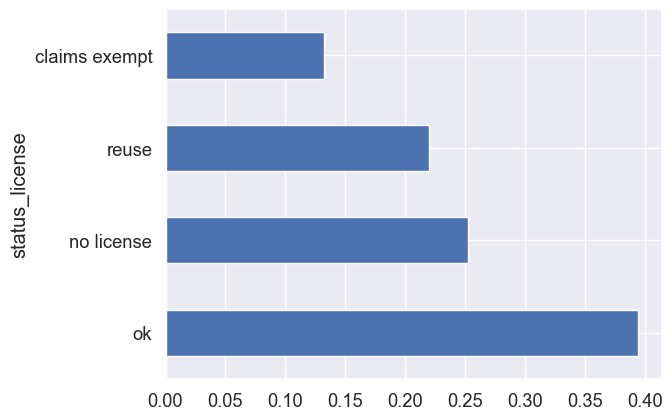

In [51]:
commercial['status_license'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

<Axes: ylabel='status_license'>

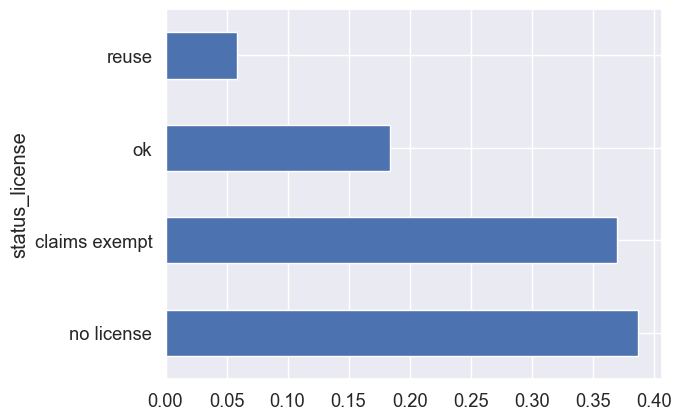

In [52]:
private['status_license'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

In [53]:
bcn['status_license'].value_counts(normalize=True)

status_license
no license       0.331822
ok               0.275932
claims exempt    0.259016
reuse            0.133230
Name: proportion, dtype: float64

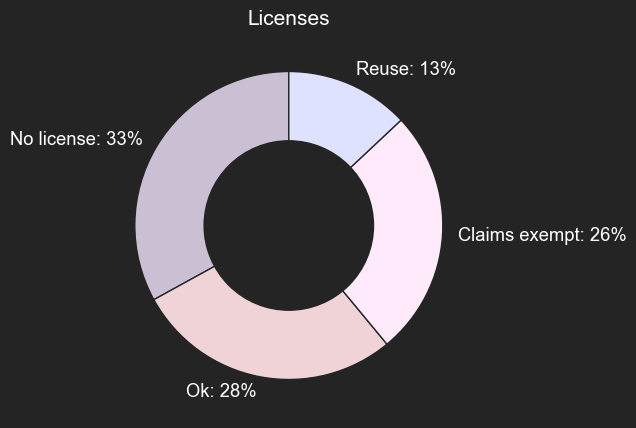

In [55]:
names =['No license: 33%', 'Ok: 28%', 'Claims exempt: 26%', 'Reuse: 13%']
sizes = [33, 28, 26, 13]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=c, startangle=90, wedgeprops={"edgecolor":'#242424'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(
    label="Licenses", 
    fontdict={"fontsize":15})
plt.show()

In [55]:
bcn['short_term'].value_counts(normalize=True)

short_term
Short term stays        0.807429
Long term stays only    0.192571
Name: proportion, dtype: float64

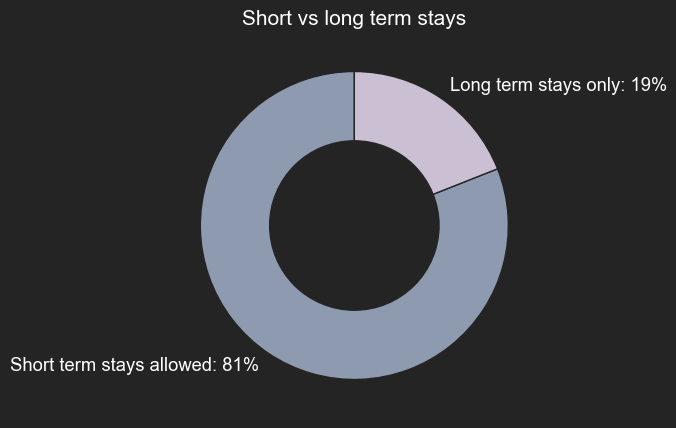

In [94]:
names =['Short term stays allowed: 81%', 'Long term stays only: 19%']
sizes = [81,19]
fig = plt.figure()
fig.set_size_inches(8,5)
fig.patch.set_facecolor('#242424')
plt.rcParams['text.color'] = 'white'
plt.rcParams
my_circle=plt.Circle( (0,0), 0.55, color='#242424')
plt.pie(x=sizes, labels=names, colors=['#8e9aaf', '#cbc0d3'], startangle=90, wedgeprops={"edgecolor":'#242424'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(
    label="Short vs long term stays", 
    fontdict={"fontsize":15})
plt.show()

<Axes: ylabel='host_response_time'>

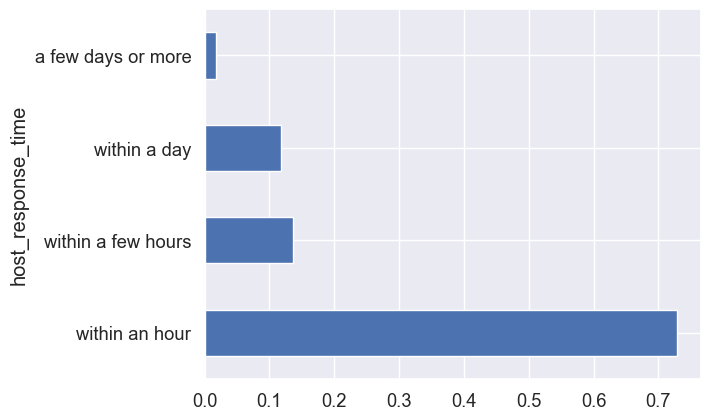

In [57]:
bcn['host_response_time'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')

In [58]:
df_license = pd.crosstab(bcn['room_type'], bcn['host_type'], normalize='index').mul(100).round(2)
df_license.head()

host_type,commercial,not_found,private
room_type,,,
Entire home/apt,61.48,0.76,37.76
Hotel room,97.12,0.00,2.88
Private room,22.85,1.40,75.75
Shared room,69.57,2.61,27.83


In [59]:
df_license = pd.crosstab(bcn['host_type'], bcn['room_type'], normalize='index').mul(100).round(2)
df_license.head()

room_type,Entire home/apt,Hotel room,Private room,Shared room
host_type,,,,
commercial,77.93,1.98,18.52,1.57
not_found,44.55,0.00,52.73,2.73
private,43.54,0.05,55.84,0.57


In [60]:
df_license = pd.crosstab(bcn['host_type'], bcn['multi_listings'], normalize='index').mul(100).round(2)
df_license.head()

multi_listings,10-19 listings,2-3 listings,20-49 listings,4-5 listings,50 or more listings,6-9 listings,single listing
host_type,,,,,,,
commercial,16.48,8.99,27.16,8.62,19.91,12.42,6.41
not_found,8.18,24.55,17.27,5.45,9.09,8.18,27.27
private,4.69,24.77,7.66,7.18,1.43,5.86,48.40


In [61]:
bcn.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_sco

In [62]:
private_with_many_listings = bcn[(bcn['total_listings'] > 3) & (bcn['host_type'] == 'private')]
private_with_many_listings.shape

(1505, 64)

In [63]:
df_license = pd.crosstab(bcn['host_type'], bcn['status_license'], normalize='index').mul(100).round(2)
df_license.head()

status_license,claims exempt,no license,ok,reuse
host_type,,,,
commercial,13.27,25.28,39.43,22.03
not_found,47.27,32.73,15.45,4.55
private,36.98,38.71,18.41,5.90


In [64]:
host_types = bcn.groupby(['host_type']).agg(listings = ('id', 'count'), listings_avg = ('total_listings', 'mean'), calculated_host_listings_count = ('calculated_host_listings_count', 'mean'),calculated_host_listings_count_entire_homes = ('calculated_host_listings_count_entire_homes', 'mean'), price = ('price', 'mean'), minimum_nights = ('minimum_nights', 'mean'), number_of_reviews = ('number_of_reviews', 'mean'), rating = ('review_scores_rating', 'mean'), reviews_month =('reviews_per_month', 'mean'))

In [65]:
host_types

,listings,listings_avg,calculated_host_listings_count,calculated_host_listings_count_entire_homes,price,minimum_nights,number_of_reviews,rating,reviews_month
host_type,,,,,,,,,
commercial,5103,38.215951,40.521654,35.981188,139.243582,12.345483,42.029199,4.493831,1.368383
not_found,110,15.463636,16.745455,13.809091,88.618182,15.054545,37.527273,4.498060,2.036716
private,5611,6.062734,6.191944,4.106755,79.684726,17.503654,47.540902,4.568772,1.270780


In [66]:
df_license = pd.crosstab(bcn['host_type'], bcn['host_is_superhost'], normalize='index').mul(100).round(2)
df_license.head()

host_is_superhost,f,t
host_type,,
commercial,84.85,15.15
not_found,90.91,9.09
private,77.85,22.15


In [67]:
df_license = pd.crosstab(bcn['host_type'], bcn['host_identity_verified'], normalize='index').mul(100).round(2)
df_license.head()


host_identity_verified,f,t
host_type,,
commercial,6.23,93.77
not_found,12.73,87.27
private,16.01,83.99


In [68]:
bcn.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_sco

In [69]:
bcn_cluster = bcn.drop(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location',
       'host_response_rate',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'minimum_minimum_nights', 'maximum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license','reviews_per_month', 'total_listings', 'multi_listings'], axis=1)

In [70]:
bcn_cluster.columns

Index(['host_response_time', 'host_acceptance_rate', 'host_is_superhost',
       'room_type', 'price', 'minimum_nights', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_type',
       'status_license', 'short_term'],
      dtype='object')

In [71]:
bcn_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14779 entries, 0 to 15654
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            11879 non-null  object 
 1   host_acceptance_rate                          12325 non-null  object 
 2   host_is_superhost                             14778 non-null  object 
 3   room_type                                     14779 non-null  object 
 4   price                                         14779 non-null  float64
 5   minimum_nights                                14779 non-null  int64  
 6   instant_bookable                              14779 non-null  object 
 7   calculated_host_listings_count                14779 non-null  int64  
 8   calculated_host_listings_count_entire_homes   14779 non-null  int64  
 9   calculated_host_listings_count_private_rooms  14779 non-null  int6

In [72]:
bcn_cluster['host_acceptance_rate'] = bcn_cluster['host_acceptance_rate'].str.rstrip("%").astype(float)/100

In [73]:
bcn_cluster['host_response_time'] = bcn_cluster['host_response_time'].fillna('within an hour')

In [74]:
mean_ar = bcn_cluster['host_acceptance_rate'].mean()
mode_mmn = bcn_cluster['minimum_nights'].mode()
mode_mmn

0    1
Name: minimum_nights, dtype: int64

In [75]:
bcn_cluster['host_acceptance_rate'] = bcn_cluster['host_acceptance_rate'].fillna((mean_ar))

In [76]:
bcn_cluster['minimum_nights'] = bcn_cluster['minimum_nights'].fillna(1)

In [77]:
bcn_cluster['host_is_superhost'] = bcn_cluster['host_is_superhost'].fillna('f')

In [78]:
bcn_cluster['host_type'].info()

<class 'pandas.core.series.Series'>
Index: 14779 entries, 0 to 15654
Series name: host_type
Non-Null Count  Dtype 
--------------  ----- 
10824 non-null  object
dtypes: object(1)
memory usage: 747.0+ KB


In [79]:
bcn_cluster = bcn_cluster[bcn_cluster.host_type.notnull()]

In [80]:
bcn_cluster = bcn_cluster[bcn_cluster['host_type']!='not_found']

In [81]:
bcn_cluster.shape

(10714, 14)

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bcn_cluster['host_is_superhost'] = le.fit_transform(bcn_cluster['host_is_superhost'])

In [83]:
bcn_cluster['instant_bookable'] = le.fit_transform(bcn_cluster['instant_bookable'])

In [84]:
bcn_cluster_scaled = bcn_cluster.copy()

In [85]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
bcn_cluster_scaled[['price', 'minimum_nights', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_acceptance_rate']] = scaler.fit_transform(bcn_cluster_scaled[['price', 'minimum_nights', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_acceptance_rate']])

In [86]:
from kmodes.kprototypes import KPrototypes

In [87]:
# cost = []
# K = range(1,9)
# for num_clusters in list(K):
#     kproto = KPrototypes (n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
#     kproto.fit_predict(bcn_cluster, categorical=[0,3,11])
#     cost.append(kproto.cost_)

In [88]:
# cost 6 clusters
K = range(1,9)
cost = [117606.19126621971,
 93747.7062223681,
 81580.14544822637,
 68150.72072175452,
 58679.64240554935,
 46962.24783412709,
 44508.94029991599,
 35295.44332495198]

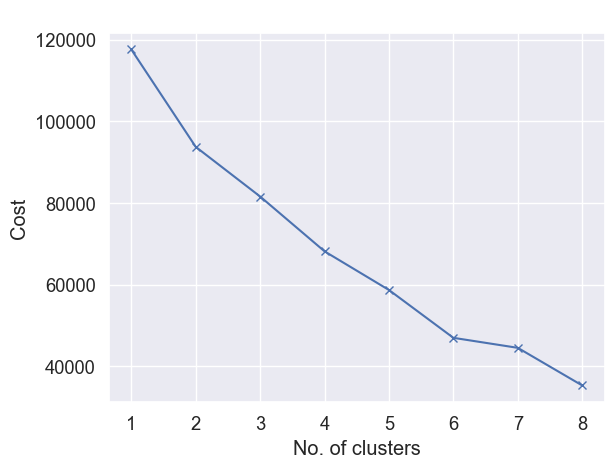

In [89]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [90]:
kproto = KPrototypes(n_clusters=6, init='Cao')
clusters = kproto.fit_predict(bcn_cluster_scaled, categorical=[0,3,11,12])

ValueError: could not convert string to float: 'Short term stays'

In [ ]:
clusters.shape

In [ ]:
bcn_cluster.reset_index(drop=True, inplace=True)

In [ ]:
df_cluster = pd.Series(clusters, name='Cluster')
bcn_clustered = pd.concat([bcn_cluster, df_cluster], axis=1)

In [ ]:
bcn_clustered.head()

In [ ]:
bcn_clustered['Segment'] = bcn_clustered['Cluster'].map({0:'First', 1:'Second', 2:'Third', 3: 'Fourth', 4: 'Fifth', 5:'Sixth'})
bcn_clustered['Segment'] = bcn_clustered['Segment'].astype('category')

bcn_clustered.groupby('Segment').agg(
    {'Cluster':'count',
    'host_response_time': lambda x: x.value_counts().index[0],
    'host_acceptance_rate': 'mean',
    'host_is_superhost': lambda x: x.value_counts().index[0],
    'room_type': lambda x: x.value_counts().index[0],
    'price': 'mean',
    'minimum_nights': 'median',
    'instant_bookable': lambda x: x.value_counts().index[0],
    'calculated_host_listings_count': 'median',
    'calculated_host_listings_count_entire_homes': 'median',
    'calculated_host_listings_count_private_rooms': 'median',
    'calculated_host_listings_count_shared_rooms': 'median',
    'status_license': lambda x: x.value_counts().index[0],
    'host_type': lambda x: x.value_counts().index[0]
    }
).reset_index()

In [ ]:
first = bcn_clustered.loc[bcn_clustered['Segment'] == 'First']

In [ ]:
first.head(20)

#### First own idea of categories (before clustering):


**OK:**
- claim commercial, is commercial, everything ok
- claim private, is private, everything ok
- no license or claim exempt, but don't offer short-term-stay (<32 days), therefore ok

**NOT OK:**
- no license or claim exempt, but offers short-term-stay(<32 days), therefore not ok
- claim private, but seemingly commercial
- multiple conditions which are not ok
- reuse of license

#### Categories according to clustering:

**OK:**

- Fifth, Second: commercial, many listings, licenses and short-term
- Fourth: commercial, many listings, no licenses and long-stay (maybe for students)
- Third: commercial, many listings, reuse of licence, rooms, long-term, cheap (hostel for the weekend)
- First: private, no license but long term

**NOT OK:**
- Sixth: private, no license, short term

Learnings from clustering: reuse of license is not necessarily suspicous, but seems to be used by hostels (one license for multiple shared rooms in one property)